# Web Scraping: List of My Future Co-Workers

Scrape the employee list on the website of my employer, store all content in a DataFrame, do some visualizations (e.g. a Wordcloud).


### Data Sources

- `https://implementconsultinggroup.com/who-we-are/people/`: List of all employees at Implement Consulting Group

### Changes

- 2019-02-25: Start project


---

### Import libraries, load data

In [80]:
# Import libraries
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re

# My functions
import EDA_functions as EDA
import cleaning_functions as cleaning

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns #, sns.set_style('whitegrid')
color = 'rebeccapurple'
%matplotlib inline

# Display settings
from IPython.display import display
pd.options.display.max_columns = 100

## 1) Scrape Employee-Data, Create Adressbook

In [ ]:
## Try to get around the 'load more' button - not yet sucessful

# with requests.Session() as session:
#     response = session.post("https://implementconsultinggroup.com/who-we-are/people/", 
#                             data={'action': 'load_more'})
#     print(response.content)

In [8]:
# Fetch web page
response = requests.get("https://implementconsultinggroup.com/who-we-are/people/")

In [10]:
# Make soup, pass text of content
soup = BeautifulSoup(response.text, "lxml")
type(soup)

bs4.BeautifulSoup

In [11]:
# Find employees, use BeautifulSoup's find_all method based on tag type and class name
employees = soup.find_all('div', {'class': "BasicGridModule base-teaser EmployeeTeaserModule mini"})
print(len(employees))

100


In [47]:
# Inspect the first employee to find selectors for the different attributes
# Note: Make sure to use print() to ensure whitespace is displayed properly
print(employees[3].prettify())

<div class="BasicGridModule base-teaser EmployeeTeaserModule mini" data-filters="1652,employee,0" data-group="A">
 <div class="inner">
  <div class="media-con">
   <div aria-label="Adam Cornfield from Implement Consulting Group" class="media image" data-aspect="11/12" data-crop="true" data-focal="0.18666666666666668,0.52" data-res="1500,1500" data-size="cover" data-url="/media/3492/adco_01390.jpg" role="img" style="padding-top:109.0909%;" title="Adam Cornfield from Implement Consulting Group">
    <noscript>
     <img alt="Adam Cornfield from Implement Consulting Group" src="/media/3492/adco_01390.jpg?width=1500&amp;height=1500&amp;center=0.18666666666666668,0.52&amp;mode=crop&amp;cropmode=percentage"/>
    </noscript>
   </div>
  </div>
  <div class="copy">
   <h4>
    Adam Cornfield
   </h4>
   <div class="text">
    <a href="tel:+45 2338 0025">
     +45 2338 0025
    </a>
    <br/>
    <a href="mailto:adco@implement.dk">
     adco@implement.dk
    </a>
   </div>
  </div>
 </div>
</d

In [46]:
# Test output on first employee
print(employees[3].select_one("h4").get_text().strip())
links = employees[3].find_all('a')
for link in links:
    text = link.get_text()
    if text != "LinkedIn":
        print(text)
    else:
        print(link['href'])

Adam Cornfield
+45 2338 0025
adco@implement.dk


In [62]:
# Store Contact Details for Employees in DataFrame

employees_list = []

for employee in employees:
    name = employee.select_one("h4").get_text().strip()
    given, last = name.split(' ', 1)
    links = employee.find_all('a')
    for e, link in enumerate(links):
        if e == 0:
            phone = link.get_text().strip()
        if e == 1:
            mail = link.get_text().strip()
        else:
            if len(links) == 2:
                linkedIn = ''
            else:
                linkedIn = link['href']
            
    employees_list.append({'Given Name': given,
                           'Last Name': last,
                           'Phone': phone,
                           'E-Mail': mail,
                           'LinkedIn Profile': linkedIn
                          })        

adressbook = pd.DataFrame(employees_list, columns = employees_list[0].keys())

In [100]:
# Create a country column
adressbook['Country'] = adressbook['E-Mail'].str.split('.').str.get(1).str.upper()
adressbook['Country'].value_counts()

# Check results
len(adressbook)
display(adressbook.head())

,Given Name,Last Name,Phone,E-Mail,LinkedIn Profile,Country
0,Aage,Lemche-Romvig,+45 3085 8012,alr@implement.dk,https://dk.linkedin.com/in/romvig,DK
1,Abtin,Salahshor,+46 0722 391338,absa@implement.dk,https://www.linkedin.com/in/abtinsalahshor/,DK
2,Adam,Cederholm,+46 704 225 404,adce@implement.se,https://www.linkedin.com/in/adam-cederholm-207...,SE
3,Adam,Cornfield,+45 2338 0025,adco@implement.dk,,DK
4,Adam,Hede,+45 3095 3195,adhe@implement.dk,https://www.linkedin.com/in/adamhede/,DK


---

## 2) Make Wordcloud from top 50 names

Wordcloud package from A. Müller, [API description](http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)

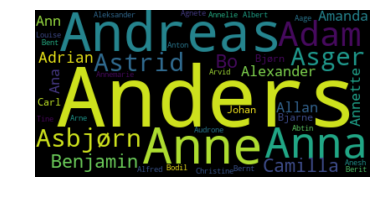

In [99]:
# Generate a word cloud image (see note below)
wordcloud = WordCloud(max_font_size=100, collocations=False).generate(text)

# Display it matplotlib style
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

**Note**: The input “text” is expected to be a natural text. If you pass a sorted list of words, words will appear in your output twice. To remove this duplication, set collocations=False. You could also pass a dict with words and frequencies and call the method generate_from_frequencies().

---